In [1]:
%pip install pandas
%pip install numpy 
%pip install statsmodels
%pip install matplotlib
%pip install sklearn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler

In [74]:
commodities_df = pd.read_csv('../all_commodities.csv')

normalized_etf_yearly = pd.read_csv('../variables_of_interest/normalized_etf_yearly.csv')
normalized_etf_monthly = pd.read_csv('../variables_of_interest/normalized_etf_monthly.csv')

## Process Yeary Commodities Data

In [75]:
commodities_df['Commodity'].unique()

array(['Coffee', 'Corn', nan, 'Sugar'], dtype=object)

In [76]:
commodities_df

,Date-Time,Value,Unit,Commodity
0,2024-01-01,203.879130,Cents per Pound,Coffee
1,2023-12-01,210.310476,Cents per Pound,Coffee
2,2023-11-01,197.433182,Cents per Pound,Coffee
3,2023-10-01,183.951364,Cents per Pound,Coffee
4,2023-09-01,183.589048,Cents per Pound,Coffee
...,...,...,...,...
1222,1990-05-01,14.619999,Cents per Pound,Sugar
1223,1990-04-01,15.240002,Cents per Pound,Sugar
1224,1990-03-01,15.310001,Cents per Pound,Sugar
1225,1990-02-01,14.650002,Cents per Pound,Sugar


In [77]:
commodities_df['Commodity'].fillna('Corn', inplace=True)
commodities_df['Unit'].fillna('Dollar per Metric Ton', inplace=True)

commodities_df['Commodity'].unique()

/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_4360/1746428885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  commodities_df['Commodity'].fillna('Corn', inplace=True)
/var/folders/1x/443khrvj3wxbl0fy_v6jmhjh0000gn/T/ipykernel_4360/1746428885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

array(['Coffee', 'Corn', 'Sugar'], dtype=object)

In [78]:
commodities_df[commodities_df['Commodity'] == 'Corn']

,Date-Time,Value,Unit,Commodity
409,2024-01-01,198.757928,Dollar per Metric Ton,Corn
410,2023-12-01,207.397969,Dollar per Metric Ton,Corn
411,2023-11-01,209.040297,Dollar per Metric Ton,Corn
412,2023-10-01,221.902519,Dollar per Metric Ton,Corn
413,2023-09-01,223.847666,Dollar per Metric Ton,Corn
...,...,...,...,...
813,1990-05-01,121.254097,Dollar per Metric Ton,Corn
814,1990-04-01,118.498337,Dollar per Metric Ton,Corn
815,1990-03-01,109.837318,Dollar per Metric Ton,Corn
816,1990-02-01,106.294167,Dollar per Metric Ton,Corn


In [82]:
commodities_monthly = commodities_df.copy()
commodities_monthly

,Date-Time,Value,Unit,Commodity
0,2024-01-01,203.879130,Cents per Pound,Coffee
1,2023-12-01,210.310476,Cents per Pound,Coffee
2,2023-11-01,197.433182,Cents per Pound,Coffee
3,2023-10-01,183.951364,Cents per Pound,Coffee
4,2023-09-01,183.589048,Cents per Pound,Coffee
...,...,...,...,...
1222,1990-05-01,14.619999,Cents per Pound,Sugar
1223,1990-04-01,15.240002,Cents per Pound,Sugar
1224,1990-03-01,15.310001,Cents per Pound,Sugar
1225,1990-02-01,14.650002,Cents per Pound,Sugar


In [69]:
commodities_df['Date-Time'] = pd.to_datetime(commodities_df['Date-Time'])
commodities_df['Year'] = commodities_df['Date-Time'].dt.year
commodities_df.dropna(inplace=True)

commodities_df = commodities_df[['Value', 'Commodity', 'Year']]
commodities_df

,Value,Commodity,Year
0,203.879130,Coffee,2024
1,210.310476,Coffee,2023
2,197.433182,Coffee,2023
3,183.951364,Coffee,2023
4,183.589048,Coffee,2023
...,...,...,...
1222,14.619999,Sugar,1990
1223,15.240002,Sugar,1990
1224,15.310001,Sugar,1990
1225,14.650002,Sugar,1990


In [70]:
commodities_grouped_df = commodities_df.groupby(['Commodity', 'Year']).mean().reset_index()
commodities_grouped_df

,Commodity,Year,Value
0,Coffee,1990,89.147504
1,Coffee,1991,85.027028
2,Coffee,1992,61.737390
3,Coffee,1993,71.118638
4,Coffee,1994,147.348975
...,...,...,...
100,Sugar,2020,12.884191
101,Sugar,2021,17.856061
102,Sugar,2022,18.825534
103,Sugar,2023,24.042175


In [71]:
commodities_grouped_df = commodities_grouped_df.pivot(index='Year', columns='Commodity', values='Value').reset_index()

commodities_grouped_df.columns.name = None
commodities_grouped_df
commodities_grouped_df.to_csv('../variables_of_interest/commodities_yearly.csv')

In [46]:
normalized_etf_yearly = normalized_etf_yearly[['Year', 'ETF', 'Price']]
normalized_etf_yearly

,Year,ETF,Price
0,1999,Agri_Machinery_ETF,35.896562
1,1999,Food_Beverage_ETF,38.574624
2,1999,Investment_Funds_ETF,127.576142
3,1999,Restaurant_FastFood_ETF,33.656642
4,1999,Retail_ETF,16.157612
...,...,...,...
125,2024,Agri_Machinery_ETF,275.591445
126,2024,Food_Beverage_ETF,423.274203
127,2024,Investment_Funds_ETF,383.809935
128,2024,Restaurant_FastFood_ETF,1523.165088


In [47]:
def merge_datasets(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index='Year', columns='ETF', values='Price').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on='Year', how='inner')
    return merged_data

temp_df2 = merge_datasets(commodities_grouped_df, normalized_etf_yearly)
temp_df2.to_csv("data/etf_normalized_vs_commodities'.csv")

temp_df2['Year'] = pd.to_numeric(temp_df2['Year'], errors='coerce')

In [50]:
temp_df2

,Year,Coffee,Corn,Sugar,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,1999,103.884424,90.294064,6.264687,35.896562,38.574624,127.576142,33.656642,16.157612
1,2000,87.204110,88.219229,8.079842,30.986466,34.642480,127.237071,30.348853,13.999203
2,2001,62.284133,89.609138,8.231553,34.254688,39.818914,111.495747,30.839901,19.521388
3,2002,61.462068,99.333267,6.236949,37.347221,42.960852,96.263762,29.173835,46.395311
4,2003,64.172862,105.245363,6.925712,42.520626,44.428565,91.971963,23.858357,41.224514
5,2004,80.479525,111.894866,7.545098,55.550495,45.953000,100.698620,29.976459,37.561603
6,2005,114.853919,98.507652,10.070184,55.327880,45.615803,105.049110,36.067338,46.506956
7,2006,114.408858,121.647393,14.788470,61.071520,46.000083,113.389157,40.772488,53.057327
8,2007,123.613878,163.609891,9.956637,81.257501,48.331924,129.130469,51.569991,47.890320
9,2008,139.712466,223.360289,12.452207,63.930424,42.753783,108.620870,45.183808,36.979868


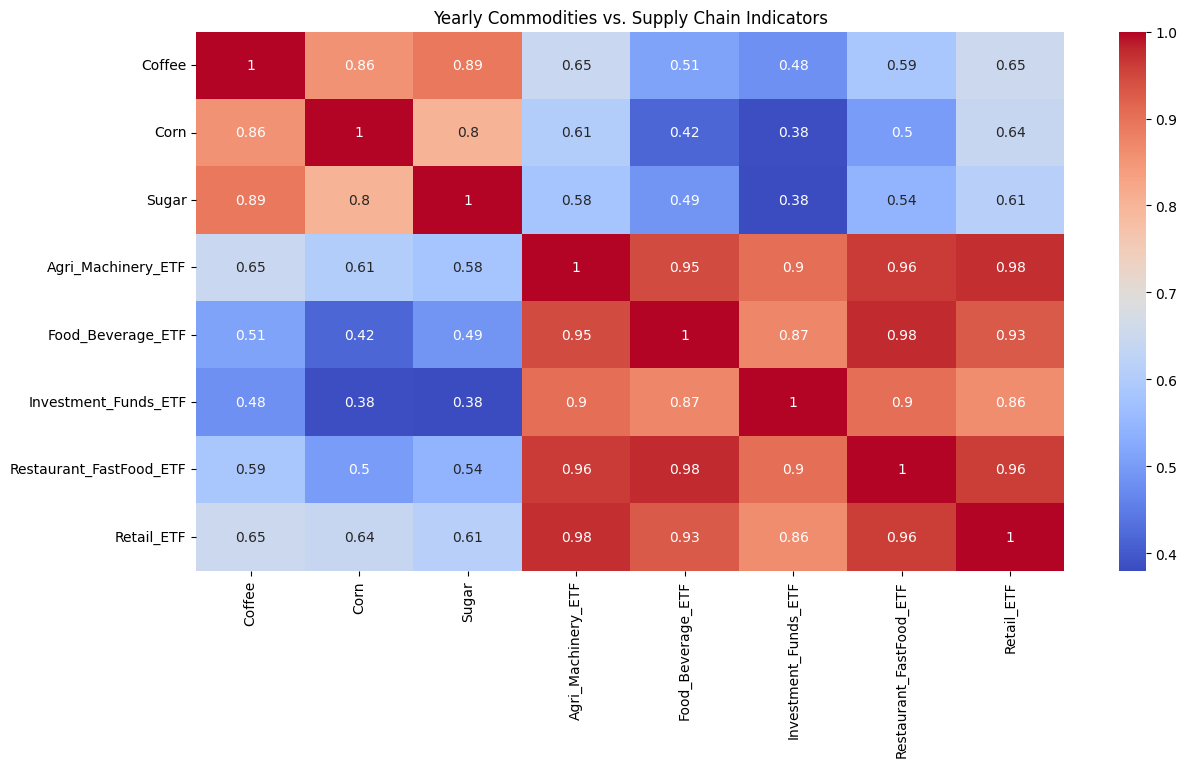

,Coffee,Corn,Sugar,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Coffee,1.000000,0.855147,0.892711,0.645262,0.511423,0.481717,0.588324,0.650818
Corn,0.855147,1.000000,0.803313,0.605223,0.417796,0.384641,0.499151,0.640106
Sugar,0.892711,0.803313,1.000000,0.579064,0.487335,0.380295,0.544621,0.610474
Agri_Machinery_ETF,0.645262,0.605223,0.579064,1.000000,0.945170,0.904119,0.962526,0.975223
Food_Beverage_ETF,0.511423,0.417796,0.487335,0.945170,1.000000,0.871706,0.976668,0.929294
Investment_Funds_ETF,0.481717,0.384641,0.380295,0.904119,0.871706,1.000000,0.903305,0.862949
Restaurant_FastFood_ETF,0.588324,0.499151,0.544621,0.962526,0.976668,0.903305,1.000000,0.960588
Retail_ETF,0.650818,0.640106,0.610474,0.975223,0.929294,0.862949,0.960588,1.000000


In [49]:
def plt_corr_matrix(df, question):
    if 'Year' in df.columns:
        if df['Year'].dtype not in ['int64', 'float64']:
            df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    if 'Year' in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=['Year'])
    
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(14, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(question)
    plt.show()

    return corr_matrix

plt_corr_matrix(temp_df2, "Yearly Commodities vs. Supply Chain Indicators")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

etfs = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Investment_Funds_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']

def evaluate_rf_regression_multiple_features(etf):
    X = temp_df2[['Corn', 'Coffee', 'Sugar']]  
    y = temp_df2[etf]  # ETF value as the target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Feature importance
    importance = rf_model.feature_importances_

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Random Forest Regression for Corn, Coffee, Sugar vs {etf}')
    plt.legend()
    plt.show()

    return mse, r2, importance

# Evaluate for each ETF
for etf in etfs:
    mse, r2, importance = evaluate_rf_regression_multiple_features(etf)
    print(f'ETF: {etf}, MSE: {mse:.2f}, R^2: {r2:.2f}')
    print(f'Feature Importances: {importance}')

## Monthly Data

In [80]:
commodities_monthly

,Date-Time,Value,Unit,Commodity
0,2024-01-01,203.879130,Cents per Pound,Coffee
1,2023-12-01,210.310476,Cents per Pound,Coffee
2,2023-11-01,197.433182,Cents per Pound,Coffee
3,2023-10-01,183.951364,Cents per Pound,Coffee
4,2023-09-01,183.589048,Cents per Pound,Coffee
...,...,...,...,...
1222,1990-05-01,14.619999,Cents per Pound,Sugar
1223,1990-04-01,15.240002,Cents per Pound,Sugar
1224,1990-03-01,15.310001,Cents per Pound,Sugar
1225,1990-02-01,14.650002,Cents per Pound,Sugar


In [83]:
commodities_monthly['Date-Time'] = pd.to_datetime(commodities_monthly['Date-Time'])

commodities_monthly['Year'] = commodities_monthly['Date-Time'].dt.year
commodities_monthly['Month'] = commodities_monthly['Date-Time'].dt.month

commodities_monthly.drop(columns=['Date-Time'], inplace=True)

commodities_monthly.dropna(inplace=True)

commodities_monthly

,Value,Unit,Commodity,Year,Month
0,203.879130,Cents per Pound,Coffee,2024,1
1,210.310476,Cents per Pound,Coffee,2023,12
2,197.433182,Cents per Pound,Coffee,2023,11
3,183.951364,Cents per Pound,Coffee,2023,10
4,183.589048,Cents per Pound,Coffee,2023,9
...,...,...,...,...,...
1222,14.619999,Cents per Pound,Sugar,1990,5
1223,15.240002,Cents per Pound,Sugar,1990,4
1224,15.310001,Cents per Pound,Sugar,1990,3
1225,14.650002,Cents per Pound,Sugar,1990,2


In [84]:
commodities_monthly['Value'] = pd.to_numeric(commodities_monthly['Value'], errors='coerce')

commodities_monthly.dropna(subset=['Value'], inplace=True)

commodities_avg_monthly = commodities_monthly.copy()

commodities_avg_monthly = commodities_avg_monthly.groupby(['Commodity', 'Year', 'Month'])['Value'].mean().reset_index()
commodities_avg_monthly

,Commodity,Year,Month,Value
0,Coffee,1990,1,75.829987
1,Coffee,1990,2,84.010010
2,Coffee,1990,3,93.959991
3,Coffee,1990,4,93.730011
4,Coffee,1990,5,92.019989
...,...,...,...,...
1222,Sugar,2023,9,26.563810
1223,Sugar,2023,10,26.903636
1224,Sugar,2023,11,27.309545
1225,Sugar,2023,12,22.145714


In [88]:
commodities_avg_monthly_pivot = commodities_avg_monthly.pivot(index=['Year', 'Month'], columns='Commodity', values='Value').reset_index()


In [91]:
commodities_avg_monthly_pivot

Commodity,Year,Month,Coffee,Corn,Sugar
0,1990,1,75.829987,105.900513,14.200001
1,1990,2,84.010010,106.294167,14.650002
2,1990,3,93.959991,109.837318,15.310001
3,1990,4,93.730011,118.498337,15.240002
4,1990,5,92.019989,121.254097,14.619999
...,...,...,...,...,...
404,2023,9,183.589048,223.847666,26.563810
405,2023,10,183.951364,221.902519,26.903636
406,2023,11,197.433182,209.040297,27.309545
407,2023,12,210.310476,207.397969,22.145714


In [94]:
commodities_avg_monthly_pivot.columns.name = None
commodities_avg_monthly_pivot

,Year,Month,Coffee,Corn,Sugar
0,1990,1,75.829987,105.900513,14.200001
1,1990,2,84.010010,106.294167,14.650002
2,1990,3,93.959991,109.837318,15.310001
3,1990,4,93.730011,118.498337,15.240002
4,1990,5,92.019989,121.254097,14.619999
...,...,...,...,...,...
404,2023,9,183.589048,223.847666,26.563810
405,2023,10,183.951364,221.902519,26.903636
406,2023,11,197.433182,209.040297,27.309545
407,2023,12,210.310476,207.397969,22.145714


In [95]:
commodities_avg_monthly_pivot.to_csv("../variables_of_interest/commodities_monthly.csv")

## Combine with Normalized ETF Monthly

In [96]:
normalized_etf_monthly

,Unnamed: 0,Year,Month,ETF,Price,Volatility
0,876,1999,11,Agri_Machinery_ETF,36.835142,18.702643
1,0,1999,11,Food_Beverage_ETF,40.019708,16.961994
2,1168,1999,11,Investment_Funds_ETF,125.522357,22.170051
3,292,1999,11,Restaurant_FastFood_ETF,34.920701,12.464929
4,584,1999,11,Retail_ETF,17.868213,0.000000
...,...,...,...,...,...,...
1455,1167,2024,2,Agri_Machinery_ETF,277.317478,133.030308
1456,291,2024,2,Food_Beverage_ETF,421.236543,269.684486
1457,1459,2024,2,Investment_Funds_ETF,391.489413,197.982956
1458,583,2024,2,Restaurant_FastFood_ETF,1607.725593,860.478030


In [97]:
normalized_etf_monthly.drop(columns=['Unnamed: 0', 'Volatility'])

,Year,Month,ETF,Price
0,1999,11,Agri_Machinery_ETF,36.835142
1,1999,11,Food_Beverage_ETF,40.019708
2,1999,11,Investment_Funds_ETF,125.522357
3,1999,11,Restaurant_FastFood_ETF,34.920701
4,1999,11,Retail_ETF,17.868213
...,...,...,...,...
1455,2024,2,Agri_Machinery_ETF,277.317478
1456,2024,2,Food_Beverage_ETF,421.236543
1457,2024,2,Investment_Funds_ETF,391.489413
1458,2024,2,Restaurant_FastFood_ETF,1607.725593


In [99]:
def merge_datasets_2(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index=['Year', 'Month'], columns='ETF', values='Price').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on=['Year', 'Month'], how='inner')
    return merged_data

monthly_df_merged2 = merge_datasets_2(commodities_avg_monthly_pivot, normalized_etf_monthly)

In [100]:
monthly_df_merged2

,Year,Month,Coffee,Corn,Sugar,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,1999,11,112.450909,85.409341,6.505000,36.835142,40.019708,125.522357,34.920701,17.868213
1,1999,12,123.165217,87.222838,5.982000,34.957983,37.129539,129.629927,32.392583,14.447012
2,2000,1,111.851429,92.953275,5.629500,37.142867,35.526435,129.359423,30.139771,15.766343
3,2000,2,104.041429,95.081619,5.351000,31.221460,32.619976,123.136288,28.223431,16.672860
4,2000,3,100.652609,95.169351,5.111200,29.319403,31.920499,127.442178,29.358011,18.823416
...,...,...,...,...,...,...,...,...,...,...
286,2023,9,183.589048,223.847666,26.563810,271.175546,329.066365,338.914651,1176.277724,211.588589
287,2023,10,183.951364,221.902519,26.903636,253.592562,316.868611,329.718627,1142.686074,198.630677
288,2023,11,197.433182,209.040297,27.309545,249.251962,342.498279,345.688258,1314.577751,199.673985
289,2023,12,210.310476,207.397969,22.145714,264.998565,407.599971,366.626038,1415.650851,214.157736


In [101]:
monthly_df_merged2.to_csv('data/etf_normalized_vs_commodities_monthly.csv')

## Correlation Matrix

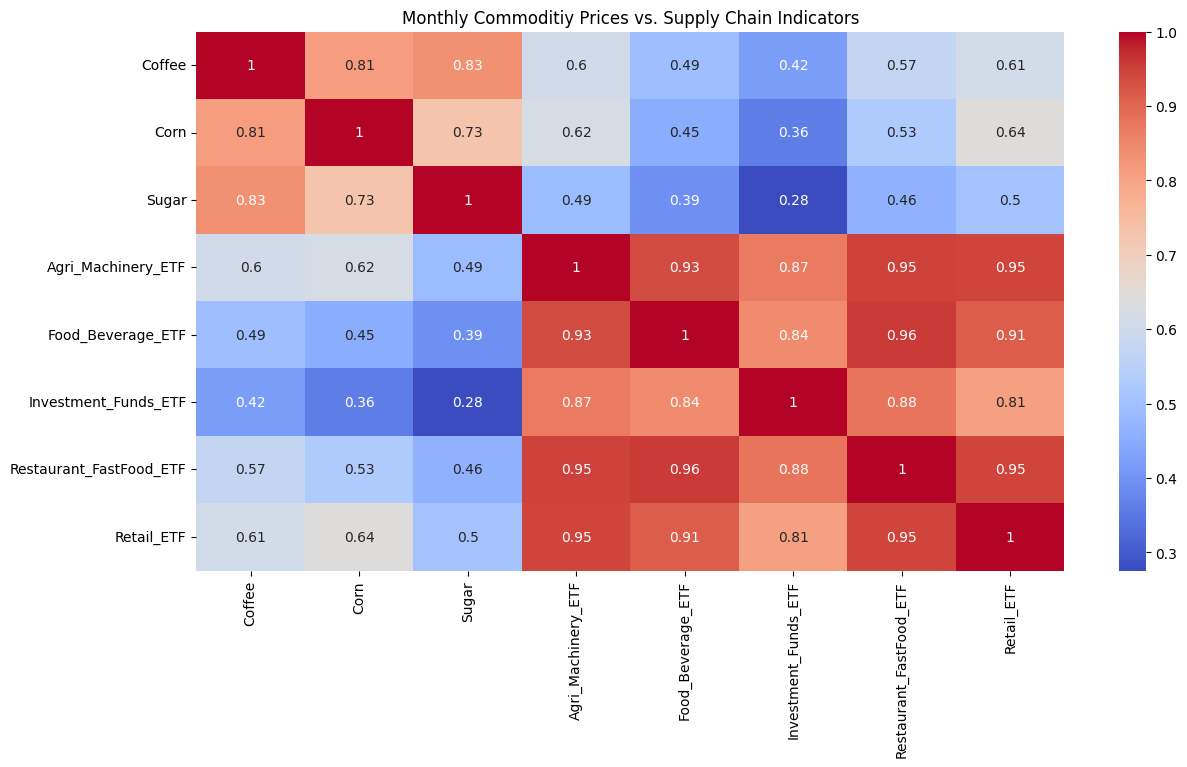

,Coffee,Corn,Sugar,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Coffee,1.000000,0.812533,0.834913,0.603881,0.490972,0.417255,0.573306,0.607945
Corn,0.812533,1.000000,0.731021,0.619272,0.451686,0.357981,0.528067,0.641530
Sugar,0.834913,0.731021,1.000000,0.485249,0.392088,0.275652,0.460171,0.502262
Agri_Machinery_ETF,0.603881,0.619272,0.485249,1.000000,0.934970,0.868259,0.946484,0.946092
Food_Beverage_ETF,0.490972,0.451686,0.392088,0.934970,1.000000,0.844171,0.955323,0.913508
Investment_Funds_ETF,0.417255,0.357981,0.275652,0.868259,0.844171,1.000000,0.879575,0.806593
Restaurant_FastFood_ETF,0.573306,0.528067,0.460171,0.946484,0.955323,0.879575,1.000000,0.945884
Retail_ETF,0.607945,0.641530,0.502262,0.946092,0.913508,0.806593,0.945884,1.000000


In [102]:
def plt_corr_matrix_month(df, question):
    if 'Year' in df.columns:
        if df['Year'].dtype not in ['int64', 'float64']:
            df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    if 'Year' in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=['Year'])
    if 'Month' in numeric_df.columns:
        numeric_df = numeric_df.drop(columns=['Month'])
    
    corr_matrix = numeric_df.corr()

    plt.figure(figsize=(14, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(question)
    plt.show()

    return corr_matrix
plt_corr_matrix_month(monthly_df_merged2, "Monthly Commoditiy Prices vs. Supply Chain Indicators")